### This notebook illustrates spatiotemporal image correlation analysis (STICS) and pair correlation functions (pCFs)
Note that you need to have movie.tif from the sim_movie simulation (or from experimental data) loaded into your workspace.
Click here to open in google colab: http://colab.research.google.com/github/jayunruh/pysimfcs/blob/main/carpet_stics_pcf.ipynb

In [1]:
#if you are using this from google colab, you need the utility modules
#(everything else should already be installed)
import os
if(not os.path.exists('pysimfcs_utils.py')):
    print('downloading pysimfcs libraries')
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/pysimfcs_utils.py
if(not os.path.exists('analysis_utils.py')):
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/analysis_utils.py
else:
    print('libraries already downloaded')

libraries already downloaded


In [2]:
import tifffile
import matplotlib.pyplot as plt
import analysis_utils as simutils
import numpy as np

In [3]:
#first read in the image stack
mov=tifffile.imread('movie.tif')
mov.shape

(256, 2, 64, 64)

In [4]:
#now get the central slice of the image as a carpet
carpet=mov[:,:,32,:]

Text(0, 0.5, 'frame')

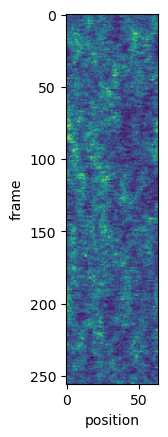

In [5]:
#show the carpet
plt.imshow(carpet[:,0,:])
plt.xlabel('position')
plt.ylabel('frame')

In [6]:
#now calculate the stics correlation function
stics=simutils.carpetstics(carpet[:,0,:])
#interpolate the g0
midpoint=stics.shape[1]//2
stics[0,midpoint]=0.5*(stics[0,midpoint-1]+stics[0,midpoint+1])
#now do binmultilog on the carpet
sticsbml,binxvals=simutils.carpetbml(stics)

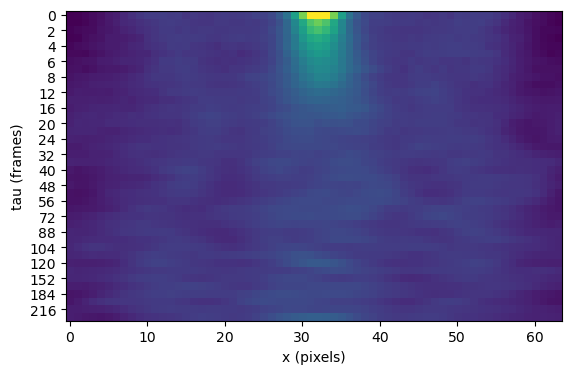

In [7]:
#show the stics carpet
plt.imshow(sticsbml)
#show the logbinned x values (every other one)
plt.yticks(range(0,sticsbml.shape[0],2),binxvals[::2])
plt.xlabel('x (pixels)')
plt.ylabel('tau (frames)')
plt.show()

In [8]:
#calculate the pair correlations for different spatial shifts
maxshift=10
pcfs=[simutils.paircorrelation(carpet[:,0,:],shift) for shift in range(maxshift)]
#now do binmultilog on each y column
pcfbmls=[simutils.carpetbml(pcf)[0] for pcf in pcfs]

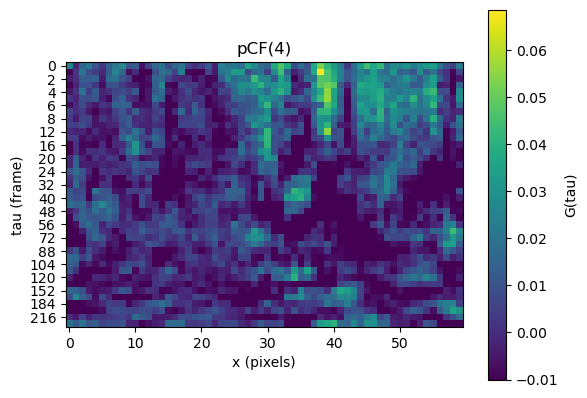

In [9]:
#now plot the pair correlation function
selshift=4
plt.imshow(pcfbmls[selshift],vmin=-0.01)
plt.yticks(range(0,pcfbmls[selshift].shape[0],2),binxvals[::2])
plt.colorbar(label='G(tau)')
plt.xlabel('x (pixels)')
plt.ylabel('tau (frame)')
plt.title('pCF('+str(selshift)+')')
plt.show()

Text(0, 0.5, 'G(tau)')

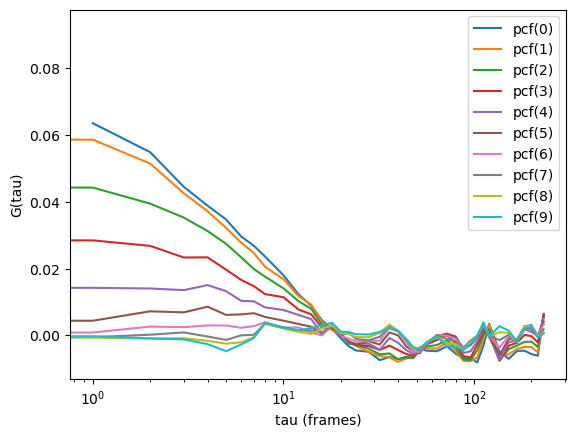

In [10]:
#calculate the average pair correlation function
avgcorrs=[pcfbmls[i].mean(axis=1) for i in range(maxshift)]
pcfnames=[f"pcf({i})" for i in range(maxshift)]
for i in range(maxshift):
    if(i==0):
        #skip the G(0) for the autocorrelation (contains shot noise)
        plt.plot(binxvals[1:],avgcorrs[i][1:])
    else:
        plt.plot(binxvals,avgcorrs[i])
plt.legend(pcfnames)
plt.xscale('log')
plt.xlabel('tau (frames)')
plt.ylabel('G(tau)')